# Student Performance Indicator

## Life cycle of a Machine Learning Project

1. Understanding the problem statment
2. Data collection
3. Data checks to perform
4. Exploratory data analysis(EDA)
5. Data pre precessing
6. Model training
7. Model Selection

## 1. Understanding the problem statement 
 
The goal of this project is to understand how a student's perforance of test is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and test preparation course.

## 2.  Data Collection

* Data source - [Kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)
* Columns - gender, race/ethnicity, parental level of educatoin, lunch, test preparation course, math score, reading score, writing score
* We have 1000 rows of data with all teh above attributes



### 2.1 Importing the data and Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Import the CSV data as Pandas DataFrame

In [2]:
df = pd.read_csv("./data/StudentsPerformance.csv")

##### Taking a look at the head

In [3]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


#### Finding the shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset Information ( based on information on kaggle)

* gender: sex of students -> Male or Female
* race/ethnicity -> Group A, B, C, D
* Parental level of education -> bachelor's degree, some college, master's degree, associate's degree, high school
* lunch: having lunhc before the test standard or free/reduced
* test preparation couse: comlete or not complete before the test
* math score 
* reading score
* writing score

## 3. Data checks to perform

* Check missing values
* check for duplicates
* check data types
* check the number of unique values of each column
* check teh statistics of data set
* check various categories present in the diffrent cateforical column

### 3.1 Check missing Values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

no missing values in the dataset great

### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

No duplicate values in the data set

### 3.3 Check data type of each column 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check statistics of dataset

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Inisights
* From above description of numerical data, all means are very close to each other - between 66 and 69.17 ( range of 3.17)
* All standard deviations are close - between 14.6 and 15.19
* While there is a minimum score of 0 for math, for wriing and reading are much higher 10 and 17 respectively

### 3.5 Exploring each coumn of data

#### Gender

In [12]:
print(f"Categories in 'gender' column: {df.gender.unique()}" )

Categories in 'gender' column: ['female' 'male']


#### Race/Ethnicity

In [21]:
print(f"Categories in 'race/ethnicity' variable: {df['race/ethnicity'].unique()}")

Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']


#### Parental level of education

In [14]:
print(f"categories in 'parental level of education' column: {df['parental level of education'].unique()}" )

categories in 'parental level of education' column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


#### Lunch

In [16]:
print(f"Categories in 'lunch' column: {df['lunch'].unique()}")

Categories in 'lunch' column: ['standard' 'free/reduced']


#### Test Preparation

In [17]:
print(f"Categories in 'test preparation course' variable: {df['test preparation course'].unique()}" )

Categories in 'test preparation course' variable: ['none' 'completed']


#### Getting numerical & categorical feutures

In [24]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'We have {len(numerical_features)} numerical features: {numerical_features}')
print(f"we have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 numerical features: ['math score', 'reading score', 'writing score']
we have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.6 Adding columns for "Total Score" and "Average"

In [25]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
len_scores = len(numerical_features)
df['average'] = df['total score']/len_scores

df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,232,77.333333
6,female,group B,some college,standard,completed,88,95,92,275,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,122,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.000000
9,female,group B,high school,free/reduced,none,38,60,50,148,49.333333


In [28]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f"Number of students with full point in math {math_full}")
print(f"Number of students with full points in writing {writing_full}")
print(f"Number of student with full points in reading {reading_full}")

Number of students with full point in math 7
Number of students with full points in writing 14
Number of student with full points in reading 17


In [30]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f"Number of students with math scores less than 20: {math_less_20}")
print(f"Number of student with writing scores less than 20: {writing_less_20}")
print(f"number of students with read scores less than 20: {reading_less_20}")

Number of students with math scores less than 20: 4
Number of student with writing scores less than 20: 3
number of students with read scores less than 20: 1


#### Insights
* From the above values we get students have performed worst in Maths
* The best performance overall is in reading

## 4. Exploring Data (Visualization)

### 4.1 Visualize average score distribution to make some conclusions

* Histogram
* Kernet Distribution Function(KDE)

#### 4.1.1 Histogram & KDE

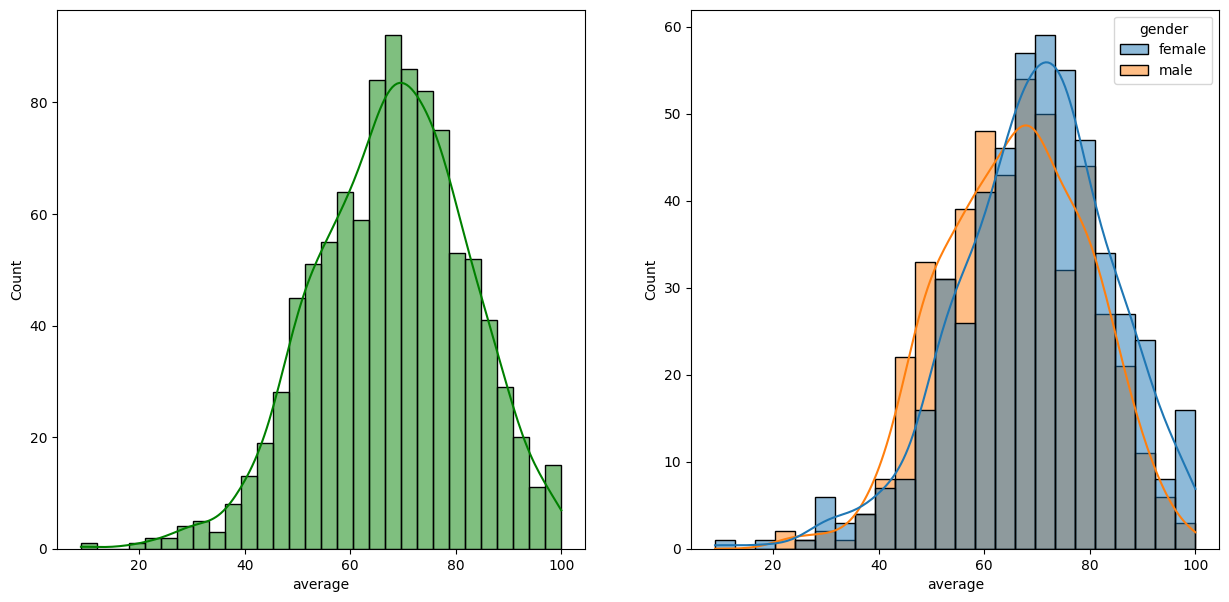

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

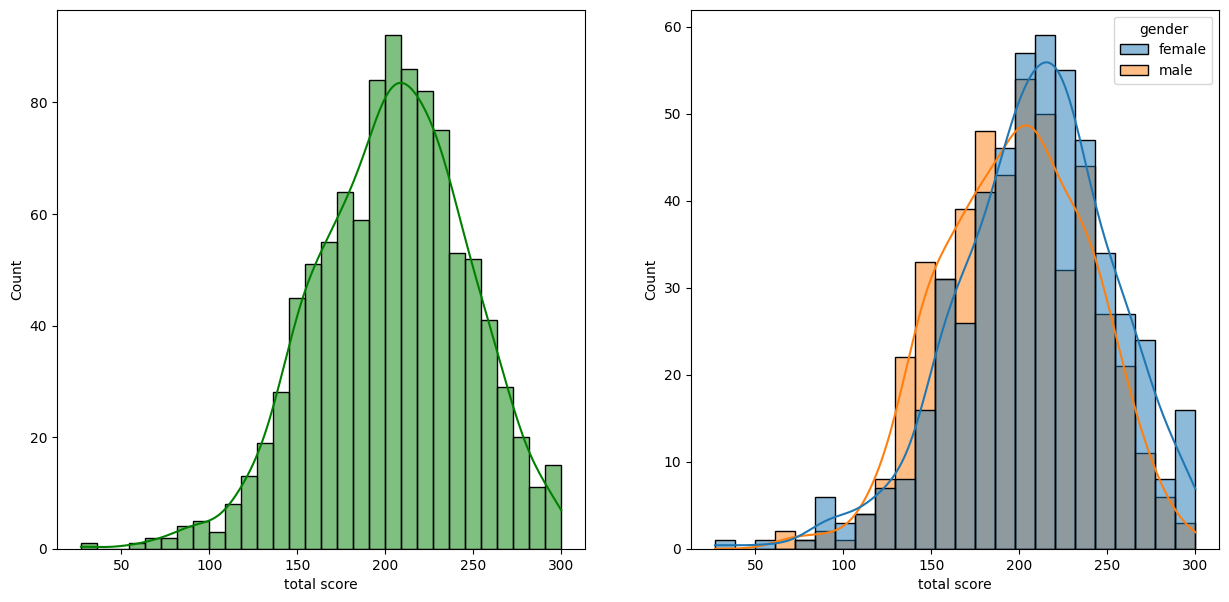

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

##### Insights
* Base on the overall trend female students tend to perform better in this dataset

<Axes: xlabel='average', ylabel='Count'>

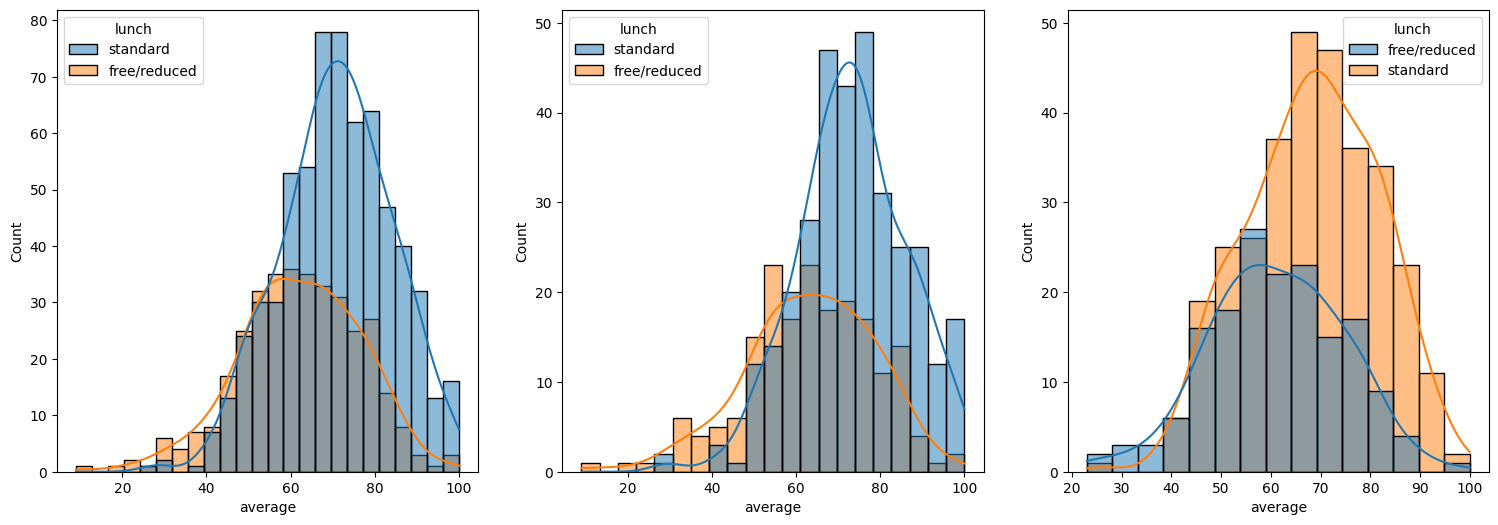

In [35]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')

##### Insights
* It is clear that overall lunch help students have better scores
* The above conclusion holds wether it is a male or female student

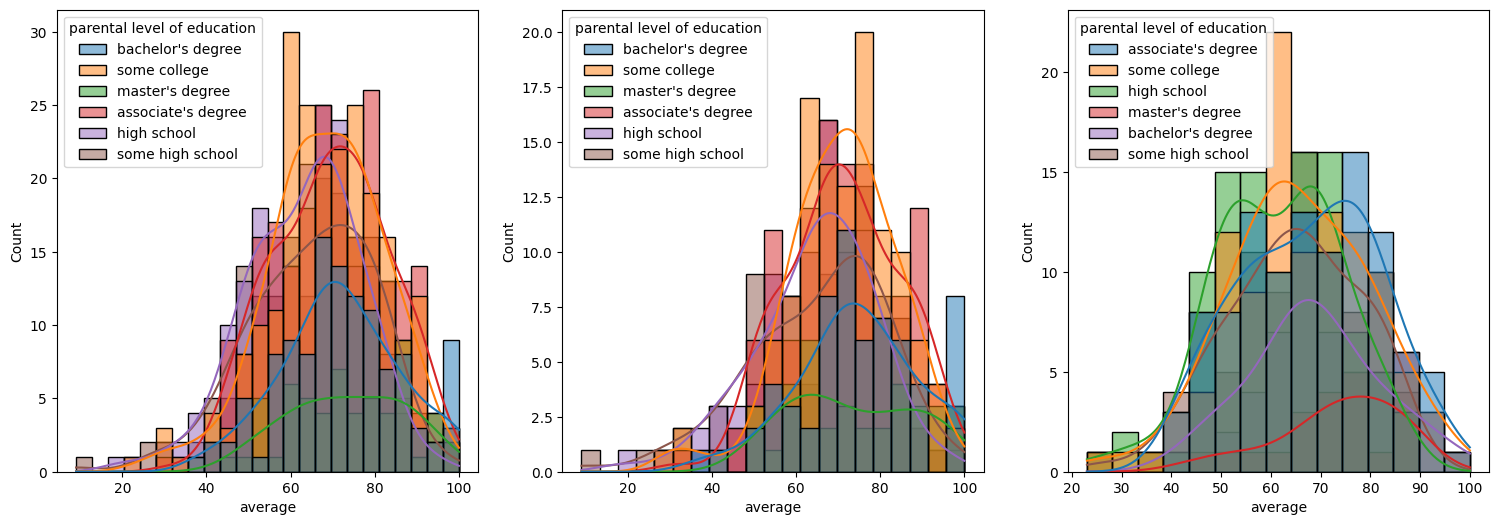

In [37]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental level of education')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental level of education')

##### Insights
* In general the level of education doesn't seem to have the highest impact on student success 

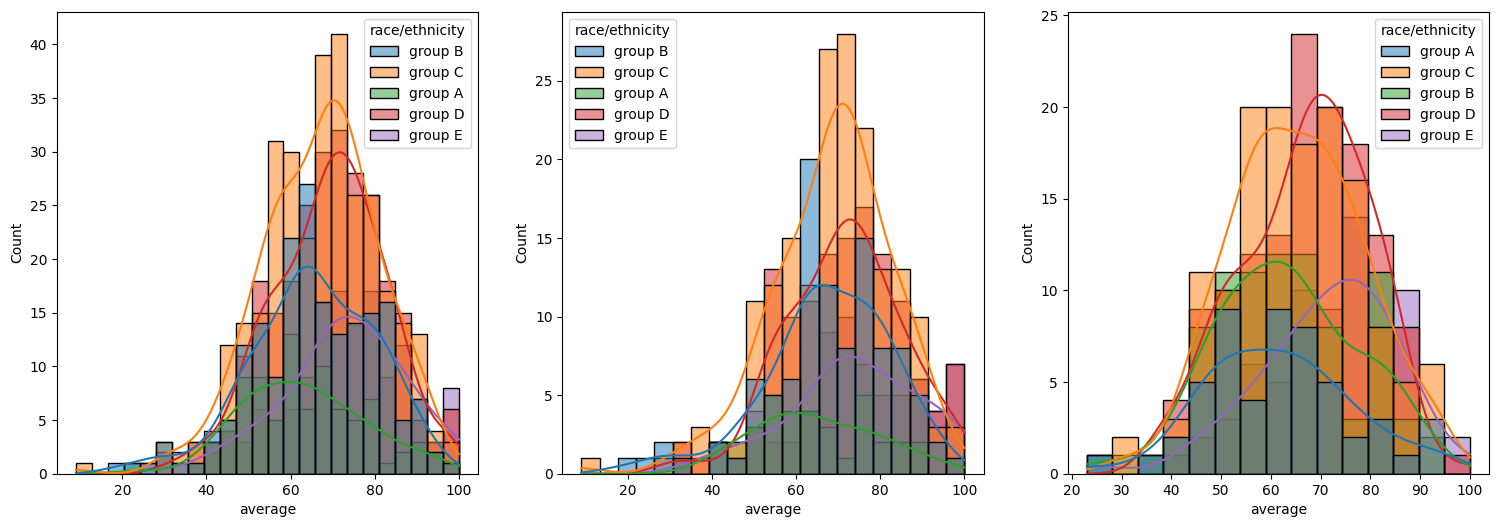

In [41]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')
plt.subplot(142)
ax= sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='race/ethnicity')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='race/ethnicity')

##### Insights
* Students in group A and B tend to have the worse performance
* students in group E and D tend to have better performance

### 4.2 Analysis of the scores of students in individual subjects

<Axes: title={'center': 'Writing Scores'}, ylabel='writing score'>

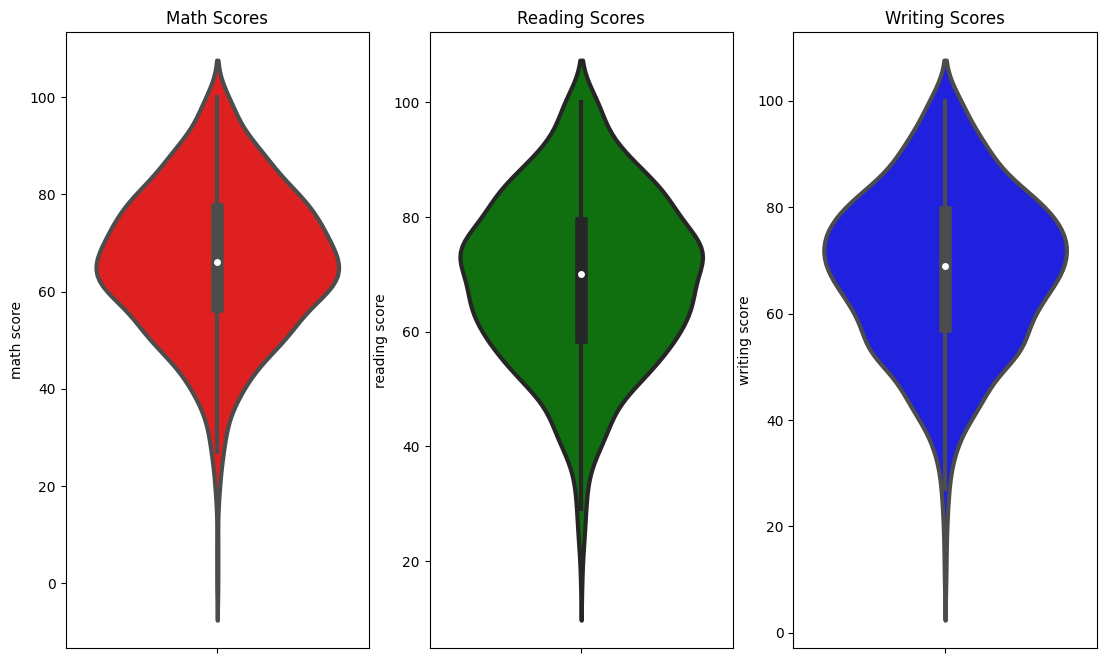

In [43]:
plt.figure(figsize=(18,8))
plt.subplot(141)
plt.title('Math Scores')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)
plt.subplot(142)
plt.title('Reading Scores')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)
plt.subplot(143)
plt.title('Writing Scores')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)

### 4.3 Multivariate analysis using pieplot

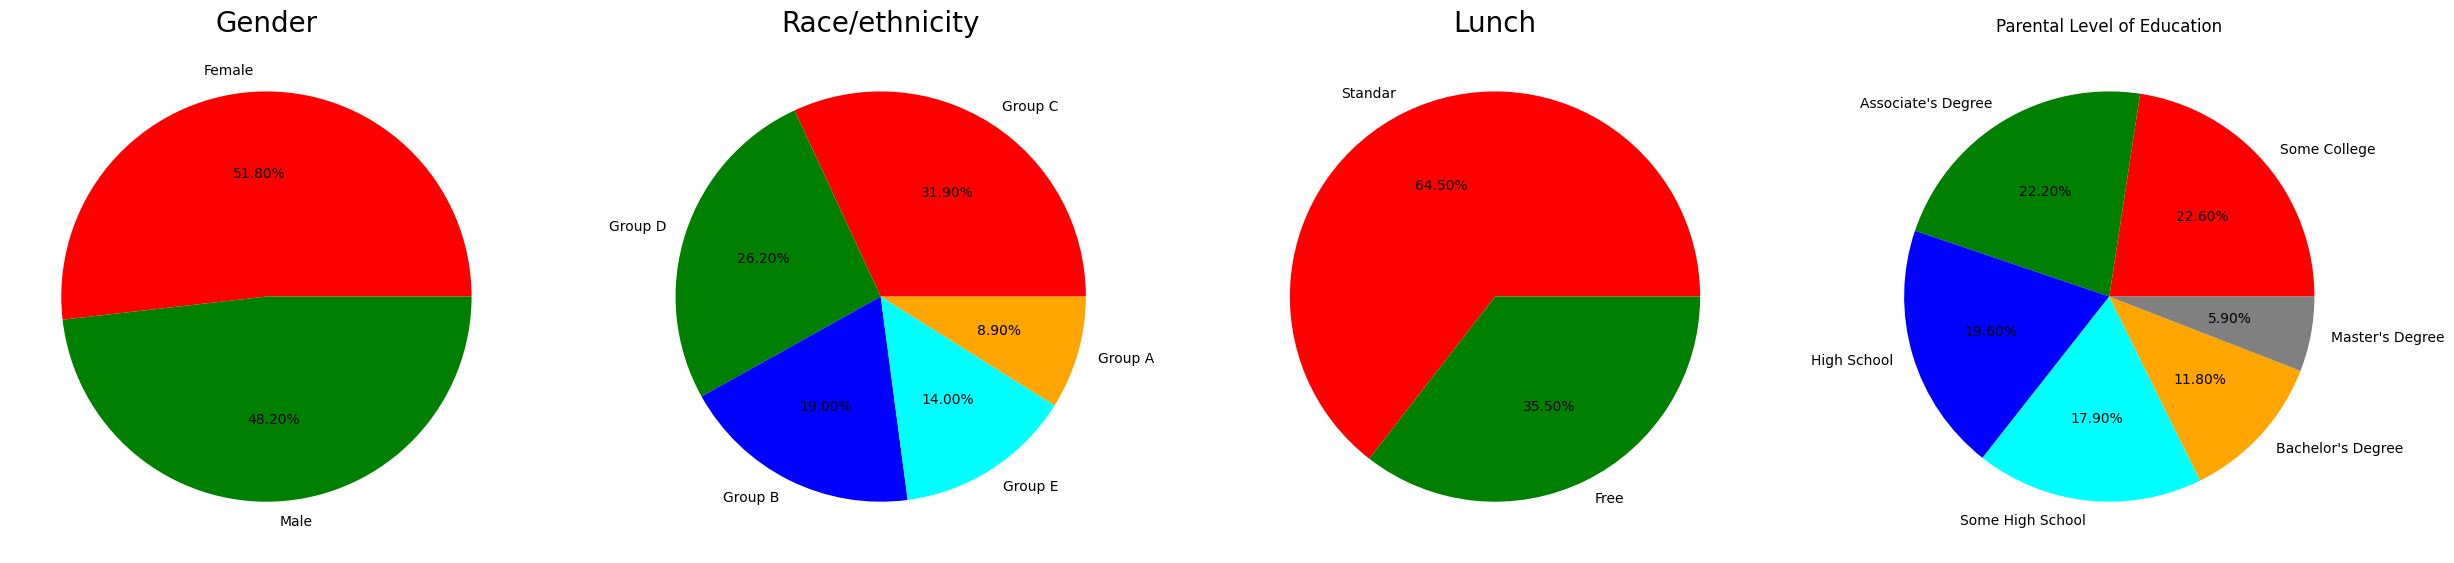

In [59]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(151)
size = df['gender'].value_counts()
labels = 'Female', "Male"
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title("Gender", fontsize=20)
plt.axis='off'

plt.subplot(152)
size= df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/ethnicity', fontsize=20)
plt.axis='off'

plt.subplot(153)
size = df['lunch'].value_counts()
labels = 'Standar', 'Free'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis='off'

plt.subplot(154)
size = df['test preparation course'].value_counts()
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Level of Education')
plt.axis='off'

plt.tight_layout()
plt.grid()
plt.show()

#### Insights
* Number of male and female students are mostly the same
* The number of students is greates in group C and smallest in group A
* Most students have standard lunches
* There is a small level of students whose parent's have a master's level of education and most parents got some college level of education 

### 4.4 Feature wise visualization

#### 4.4.1 Gender Column

* how is the distribution of students?
* Does gender have an impact on performace?

##### Univariate analysis (gender distribution)

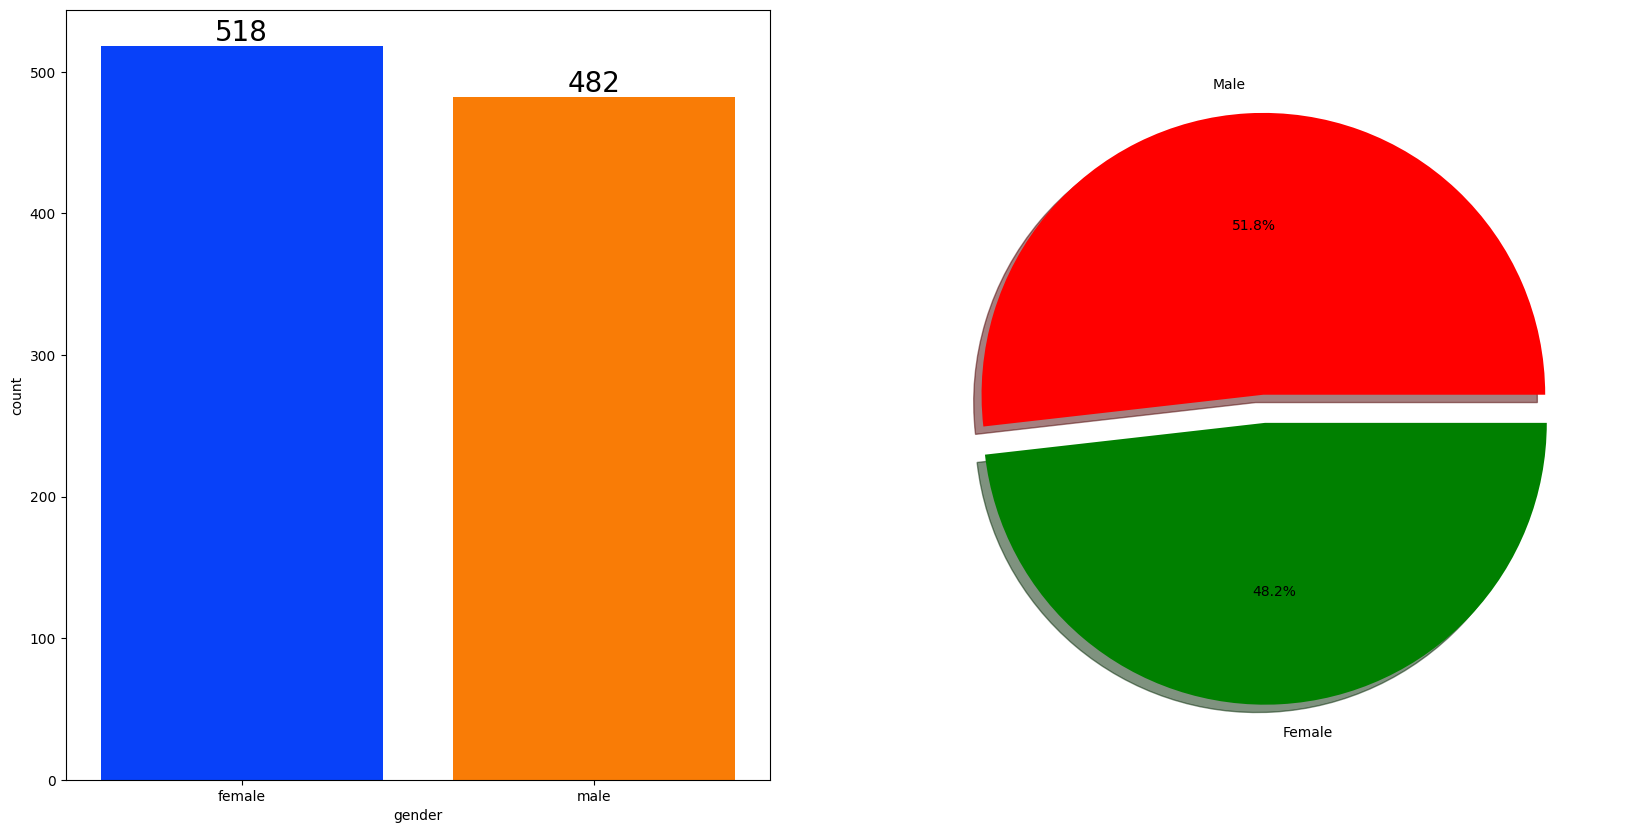

In [63]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright',ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0,0.1], autopct='%1.1f%%', shadow=True, colors=['red','green'])
plt.show()

##### Insights
* Gender have a balanced distribution

##### Bivariate Analysis (Gender and performance)

In [68]:
gender_group = df.groupby('gender').mean()
gender_group.head(12)

TypeError: Could not convert group Bgroup Cgroup Bgroup Bgroup Bgroup Bgroup Bgroup Agroup Cgroup Bgroup Cgroup Bgroup Cgroup Cgroup Dgroup Dgroup Bgroup Egroup Dgroup Dgroup Dgroup Cgroup Bgroup Egroup Agroup Cgroup Dgroup Cgroup Cgroup Egroup Cgroup Cgroup Dgroup Cgroup Cgroup Dgroup Agroup Dgroup Egroup Bgroup Cgroup Cgroup Dgroup Agroup Dgroup Cgroup Bgroup Egroup Dgroup Dgroup Dgroup Cgroup Dgroup Bgroup Bgroup Dgroup Dgroup Egroup Bgroup Dgroup Dgroup Cgroup Cgroup Cgroup Bgroup Agroup Cgroup Cgroup Dgroup Cgroup Egroup Cgroup Dgroup Bgroup Cgroup Egroup Bgroup Egroup Egroup Cgroup Bgroup Bgroup Cgroup Dgroup Cgroup Cgroup Cgroup Bgroup Cgroup Bgroup Dgroup Cgroup Egroup Dgroup Cgroup Egroup Bgroup Cgroup Bgroup Bgroup Cgroup Dgroup Bgroup Bgroup Bgroup Cgroup Egroup Cgroup Dgroup Cgroup Bgroup Egroup Cgroup Cgroup Bgroup Dgroup Egroup Dgroup Bgroup Bgroup Dgroup Bgroup Egroup Cgroup Bgroup Cgroup Cgroup Cgroup Egroup Cgroup Dgroup Dgroup Egroup Dgroup Dgroup Cgroup Egroup Cgroup Dgroup Dgroup Bgroup Bgroup Egroup Cgroup Cgroup Bgroup Dgroup Bgroup Cgroup Cgroup Dgroup Dgroup Cgroup Egroup Cgroup Cgroup Cgroup Cgroup Bgroup Cgroup Bgroup Bgroup Dgroup Cgroup Bgroup Cgroup Cgroup Bgroup Cgroup Cgroup Cgroup Bgroup Cgroup Dgroup Bgroup Cgroup Dgroup Agroup Dgroup Cgroup Dgroup Dgroup Dgroup Dgroup Agroup Bgroup Egroup Agroup Egroup Egroup Cgroup Dgroup Dgroup Cgroup Bgroup Cgroup Cgroup Agroup Dgroup Cgroup Cgroup Bgroup Dgroup Dgroup Cgroup Cgroup Dgroup Dgroup Agroup Cgroup Cgroup Agroup Cgroup Dgroup Agroup Bgroup Cgroup Cgroup Egroup Cgroup Cgroup Dgroup Egroup Egroup Cgroup Cgroup Dgroup Agroup Cgroup Cgroup Cgroup Dgroup Bgroup Dgroup Dgroup Dgroup Bgroup Cgroup Agroup Cgroup Cgroup Cgroup Bgroup Cgroup Dgroup Bgroup Dgroup Bgroup Egroup Dgroup Bgroup Cgroup Bgroup Bgroup Cgroup Dgroup Egroup Dgroup Bgroup Cgroup Cgroup Dgroup Cgroup Cgroup Cgroup Egroup Cgroup Dgroup Cgroup Dgroup Dgroup Agroup Cgroup Bgroup Cgroup Cgroup Bgroup Dgroup Cgroup Dgroup Egroup Dgroup Cgroup Cgroup Egroup Bgroup Bgroup Dgroup Dgroup Egroup Dgroup Dgroup Dgroup Cgroup Agroup Cgroup Cgroup Agroup Egroup Cgroup Cgroup Dgroup Dgroup Dgroup Cgroup Egroup Cgroup Cgroup Egroup Bgroup Cgroup Cgroup Agroup Cgroup Egroup Cgroup Egroup Cgroup Bgroup Cgroup Bgroup Dgroup Dgroup Dgroup Bgroup Egroup Bgroup Dgroup Egroup Bgroup Dgroup Agroup Dgroup Agroup Bgroup Bgroup Dgroup Dgroup Cgroup Cgroup Cgroup Bgroup Cgroup Cgroup Cgroup Dgroup Bgroup Egroup Cgroup Dgroup Cgroup Egroup Cgroup Egroup Cgroup Dgroup Cgroup Dgroup Cgroup Agroup Dgroup Egroup Bgroup Dgroup Bgroup Dgroup Egroup Dgroup Bgroup Bgroup Cgroup Cgroup Cgroup Bgroup Egroup Dgroup Bgroup Cgroup Egroup Bgroup Agroup Cgroup Cgroup Cgroup Cgroup Egroup Dgroup Cgroup Dgroup Bgroup Bgroup Cgroup Dgroup Bgroup Cgroup Bgroup Bgroup Cgroup Agroup Dgroup Bgroup Bgroup Cgroup Bgroup Egroup Bgroup Cgroup Bgroup Dgroup Bgroup Egroup Egroup Cgroup Egroup Bgroup Cgroup Dgroup Egroup Cgroup Cgroup Agroup Bgroup Cgroup Agroup Dgroup Bgroup Cgroup Cgroup Cgroup Dgroup Agroup Cgroup Bgroup Cgroup Agroup Cgroup Dgroup Bgroup Dgroup Cgroup Agroup Egroup Bgroup Cgroup Cgroup Egroup Cgroup Cgroup Cgroup Dgroup Dgroup Egroup Bgroup Egroup Cgroup Egroup Dgroup Egroup Egroup Agroup Egroup Egroup Bgroup Dgroup Cgroup Agroup Dgroup Dgroup Dgroup Cgroup Agroup Cgroup Cgroup Bgroup Egroup Cgroup Cgroup Cgroup Bgroup Dgroup Cgroup Egroup Dgroup Bgroup Cgroup Dgroup Egroup Dgroup Egroup Cgroup Dgroup Dgroup Agroup Dgroup Egroup Cgroup Dgroup Egroup Bgroup Dgroup Agroup Dgroup Agroup Cgroup Cgroup Bgroup Agroup Cgroup Cgroup Agroup Dgroup Bgroup Dgroup Dgroup Egroup Cgroup Dgroup D to numeric